# Phase 5 Capstone

# Predicting Obesity/ Obesity Prediction

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 

## Data Understanding 

## Data Preparation

## Modeling

## Evaluation

## Deployment

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 
import zipfile

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Importing packages for statistics
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import kstest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
from sklearn.metrics import log_loss, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import os


In [3]:
# Function to load dataset 

def load_csv_from_zip(zip_file_path, csv_file_name):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Check if the CSV file exists in the zip file
        if csv_file_name in zip_ref.namelist():
            # Read the CSV file directly into a DataFrame
            with zip_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
                return df
        else:
            print(f"CSV file '{csv_file_name}' not found in the zip file.")
            return None

zip_file_path = "data/brfss2022.csv.zip"
csv_file_name = "brfss2022.csv"
df = load_csv_from_zip(zip_file_path, csv_file_name)
if df is not None:
    print("CSV file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame

CSV file loaded successfully!
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  


In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

# Loop through the columns to get column names and data types
for column in df.columns:
    print(column, df[column].dtype)

# Get unique values for each column
for column in df.columns:
    print(column, df[column].unique())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
0       1.0  5.397605e-79     

In [5]:
# Previewing df shape
print(df.shape)

#Printing out the total number of rows and columns in the BRFSS dataset
n_rows, n_cols = df.shape
print('The number of rows in the dataset is', n_rows)
print('The number of columns in the dataset is', n_cols)

(445132, 326)
The number of rows in the dataset is 445132
The number of columns in the dataset is 326


In [6]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [7]:
# Previewing general information on dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), int64(5)
memory usage: 1.1 GB
None


Looking at the initial dataset information, this dataset contains 445132 entries with a total of 326 columns with datatypes being integers and floats. While there are some numerical columns, a good amount of the columns are categoricla/numerical. The many columns represent  various health-related risk behaviors, chronic health conditions, demographics, location, and even the use of preventive services along with other variables. I plan to narrow down the columns for the dataset, choosing the ones relevant for this analysis. 

In [8]:
#Selecting a subset of relevant columns out of the 326 variables in the data for exploratory analysis----------------------
col_selected = [ #Record Identification/ Demographics----------------------------------------------------------------------
            '_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            '_BMI5', 'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']


In [9]:
# Creating dataset of selected variables 
df_subset = df[col_selected].copy()
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445132 non-null  float64
 1   _SEX      445132 non-null  float64
 2   _AGEG5YR  445132 non-null  float64
 3   _AGE80    445132 non-null  float64
 4   _AGE_G    445132 non-null  float64
 5   MARITAL   445124 non-null  float64
 6   _EDUCAG   445132 non-null  float64
 7   _INCOMG1  445132 non-null  float64
 8   VETERAN3  440959 non-null  float64
 9   EMPLOY1   438936 non-null  float64
 10  _CHLDCNT  445131 non-null  float64
 11  _METSTAT  435724 non-null  float64
 12  _URBSTAT  435724 non-null  float64
 13  _IMPRACE  445132 non-null  float64
 14  _RACE1    445130 non-null  float64
 15  _RACEPR1  445132 non-null  float64
 16  _HISPANC  445132 non-null  float64
 17  _BMI5     396326 non-null  float64
 18  GENHLTH   445129 non-null  float64
 19  _RFHLTH   445132 non-null  float64
 20  PHYS

In [10]:
#Previewing first 10 rows 
df_subset.head(10)


,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,_BMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2
0,1.0,2.0,13.0,80.0,6.0,1.0,4.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,8.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,5.397605e-79
1,1.0,2.0,13.0,80.0,6.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2657.0,1.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,6.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
2,1.0,2.0,8.0,56.0,5.0,1.0,4.0,6.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2561.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
3,1.0,2.0,14.0,73.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2330.0,1.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,7.0,9.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
4,1.0,2.0,5.0,43.0,3.0,1.0,3.0,3.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2177.0,4.0,2.0,2.0,2.0,88.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,1.400000e+02
5,1.0,1.0,13.0,80.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2608.0,5.0,2.0,1.0,2.0,88.0,1.0,2.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
6,1.0,2.0,13.0,80.0,6.0,2.0,4.0,5.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2296.0,2.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.330000e+02
7,1.0,2.0,13.0,80.0,6.0,3.0,2.0,5.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2781.0,3.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,1.0,5.397605e-79
8,1.0,2.0,12.0,78.0,6.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,3.0,4.0,1.0,2.0,1.0,5.397605e-79
9,1.0,2.0,11.0,72.0,6.0,1.0,4.0,5.0,2.0,7.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2905.0,3.0,1.0,1.0,2.0,88.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,2.300000e+01


In [11]:
#Computing percent missing values in each column in the dataset

percent_missing = ((df_subset.isnull() | df_subset.isna()).sum() * 100 / df_subset.index.size).round(2)
missing_value_df = pd.DataFrame({'column_name': df_subset.columns,
                                 'percent_missing': percent_missing})

In [12]:
missing_value_df

,column_name,percent_missing
_STATE,_STATE,0.00
_SEX,_SEX,0.00
_AGEG5YR,_AGEG5YR,0.00
_AGE80,_AGE80,0.00
_AGE_G,_AGE_G,0.00
MARITAL,MARITAL,0.00
_EDUCAG,_EDUCAG,0.00
_INCOMG1,_INCOMG1,0.00
VETERAN3,VETERAN3,0.94
EMPLOY1,EMPLOY1,1.39


In [13]:
#Inspecting unique values and value counts for all variables
for col in df_subset:
    print(f"{col} - unique values: ")
    print(df_subset[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72. 78.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8. 14.  5. 12. 11. 10.  9.  7.  6.  4.  2.  3.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 73. 43. 78. 72. 57. 65. 70. 62. 63. 67. 79. 68. 66. 76. 74. 51.
 71. 61. 64. 60. 52. 69. 46. 58. 38. 77. 59. 54. 75. 35. 55. 45. 44. 50.
 47. 53. 40. 49. 28. 30. 48. 41. 42. 36. 31. 33. 27. 26. 29. 34. 20. 19.
 37. 25. 32. 18. 24. 23. 39. 22. 21.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[ 1.  3.  2.  4.  5.  6.  9. nan] 

------------------------------------
_EDUCAG - unique v

In [14]:
# checking for null
pd.set_option('display.max_rows', 500)
print(df_subset.isna().sum())

_STATE          0
_SEX            0
_AGEG5YR        0
_AGE80          0
_AGE_G          0
MARITAL         8
_EDUCAG         0
_INCOMG1        0
VETERAN3     4173
EMPLOY1      6196
_CHLDCNT        1
_METSTAT     9408
_URBSTAT     9408
_IMPRACE        0
_RACE1          2
_RACEPR1        0
_HISPANC        0
_BMI5       48806
GENHLTH         3
_RFHLTH         0
PHYSHLTH        5
_PHYS14D        0
MENTHLTH        3
_MENT14D        0
EXERANY2        2
_TOTINDA        0
SLEPTIM1        3
_HLTHPLN        0
PERSDOC3        2
CHECKUP1        3
ADDEPEV3        7
HAVARTH4        3
_DRDXAR2     2633
_MICHD       5021
DIABETE4        3
DECIDE      20986
_SMOKER3        0
SMOKE100    31777
USENOW3     32600
ECIGNOW2    33579
_CURECI2        0
DRNKANY6        0
_RFBING6        0
_DRNKWK2        0
dtype: int64


In [15]:
#Checking duplicates count

df_subset.duplicated().sum()


12

In [16]:
# Dropping duplicate rows
df_subset.drop_duplicates(inplace=True)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445120 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445120 non-null  float64
 1   _SEX      445120 non-null  float64
 2   _AGEG5YR  445120 non-null  float64
 3   _AGE80    445120 non-null  float64
 4   _AGE_G    445120 non-null  float64
 5   MARITAL   445112 non-null  float64
 6   _EDUCAG   445120 non-null  float64
 7   _INCOMG1  445120 non-null  float64
 8   VETERAN3  440949 non-null  float64
 9   EMPLOY1   438926 non-null  float64
 10  _CHLDCNT  445119 non-null  float64
 11  _METSTAT  435712 non-null  float64
 12  _URBSTAT  435712 non-null  float64
 13  _IMPRACE  445120 non-null  float64
 14  _RACE1    445118 non-null  float64
 15  _RACEPR1  445120 non-null  float64
 16  _HISPANC  445120 non-null  float64
 17  _BMI5     396318 non-null  float64
 18  GENHLTH   445117 non-null  float64
 19  _RFHLTH   445120 non-null  float64
 20  PHYSHLTH 

In [21]:
# Imputing mean for missing BMI values 
from sklearn.impute import SimpleImputer

# Reshape the input data to a 2D array
X_train_2d = df_subset['_BMI5'].values.reshape(-1, 1)

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
df_subset['_BMI5'] = imputer.fit_transform(X_train_2d)

In [22]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445120 entries, 0 to 445131
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445120 non-null  float64
 1   _SEX      445120 non-null  float64
 2   _AGEG5YR  445120 non-null  float64
 3   _AGE80    445120 non-null  float64
 4   _AGE_G    445120 non-null  float64
 5   MARITAL   445112 non-null  float64
 6   _EDUCAG   445120 non-null  float64
 7   _INCOMG1  445120 non-null  float64
 8   VETERAN3  440949 non-null  float64
 9   EMPLOY1   438926 non-null  float64
 10  _CHLDCNT  445119 non-null  float64
 11  _METSTAT  435712 non-null  float64
 12  _URBSTAT  435712 non-null  float64
 13  _IMPRACE  445120 non-null  float64
 14  _RACE1    445118 non-null  float64
 15  _RACEPR1  445120 non-null  float64
 16  _HISPANC  445120 non-null  float64
 17  _BMI5     445120 non-null  float64
 18  GENHLTH   445117 non-null  float64
 19  _RFHLTH   445120 non-null  float64
 20  PHYSHLTH 

In [23]:
# Making copy of df 
# Dropping entries with placeholder values that are equal to 7777.0, 9999.0, 
# 77.0, 99.0, 9.0 as those are zero placeholders for certain columns 
df_copy = df_subset.copy()

# Dropping additional entries with placeholder values 
df_copy = df_copy[df_copy["_DRNKWK2"] != 99900.0]
df_copy = df_copy[df_copy["MENTHLTH"] != 77.0]
df_copy = df_copy[df_copy["MENTHLTH"] != 99.0]
df_copy = df_copy[df_copy["PHYSHLTH"] != 77.0]
df_copy = df_copy[df_copy["PHYSHLTH"] != 99.0]
df_copy = df_copy[df_copy["_HLTHPLN"] != 9.0]
df_copy = df_copy[df_copy["_RFHLTH"] != 9.0]


# Dropping the rest of the placeholder values in columns
df_copy = df_copy[df_copy['_AGEG5YR'] != 14.0]
df_copy = df_copy[df_copy['MARITAL'] != 9.0]
df_copy = df_copy[df_copy['_EDUCAG'] != 9.0]
df_copy = df_copy[df_copy['_INCOMG1'] != 9.0]
df_copy = df_copy[df_copy["VETERAN3"] != 9.0]
df_copy = df_copy[df_copy["VETERAN3"] != 7.0]
df_copy = df_copy[df_copy["EMPLOY1"] != 9.0]
df_copy = df_copy[df_copy["_CHLDCNT"] != 9.0]
df_copy = df_copy[df_copy["_RACE1"] != 9.0]
df_copy = df_copy[df_copy["_HISPANC"] != 9.0]
df_copy = df_copy[df_copy["GENHLTH"] != 9.0]
df_copy = df_copy[df_copy["EXERANY2"] != 9.0]
df_copy = df_copy[df_copy["_TOTINDA"] != 9.0]
df_copy = df_copy[df_copy["SLEPTIM1"] != 77.0]
df_copy = df_copy[df_copy["SLEPTIM1"] != 99.0]
df_copy = df_copy[df_copy["PERSDOC3"] != 7.0]
df_copy = df_copy[df_copy["PERSDOC3"] != 9.0]
df_copy = df_copy[df_copy["CHECKUP1"] != 7.0]
df_copy = df_copy[df_copy["CHECKUP1"] != 9.0]
df_copy = df_copy[df_copy["ADDEPEV3"] != 7.0]
df_copy = df_copy[df_copy["ADDEPEV3"] != 9.0]
df_copy = df_copy[df_copy["DIABETE4"] != 7.0]
df_copy = df_copy[df_copy["DIABETE4"] != 9.0]
df_copy = df_copy[df_copy["DECIDE"] != 7.0]
df_copy = df_copy[df_copy["DECIDE"] != 9.0]
df_copy = df_copy[df_copy["_SMOKER3"] != 9.0]
df_copy = df_copy[df_copy["SMOKE100"] != 7.0]
df_copy = df_copy[df_copy["SMOKE100"] != 9.0]
df_copy = df_copy[df_copy["USENOW3"] != 7.0]
df_copy = df_copy[df_copy["USENOW3"] != 9.0]
df_copy = df_copy[df_copy["ECIGNOW2"] != 7.0]
df_copy = df_copy[df_copy["ECIGNOW2"] != 9.0]
df_copy = df_copy[df_copy["_CURECI2"] != 9.0]
df_copy = df_copy[df_copy["_RFBING6"] != 9.0]
df_copy = df_copy[df_copy["_DRNKWK2"] != 99900.0]



df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284941 entries, 1 to 445130
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    284941 non-null  float64
 1   _SEX      284941 non-null  float64
 2   _AGEG5YR  284941 non-null  float64
 3   _AGE80    284941 non-null  float64
 4   _AGE_G    284941 non-null  float64
 5   MARITAL   284941 non-null  float64
 6   _EDUCAG   284941 non-null  float64
 7   _INCOMG1  284941 non-null  float64
 8   VETERAN3  284941 non-null  float64
 9   EMPLOY1   284940 non-null  float64
 10  _CHLDCNT  284941 non-null  float64
 11  _METSTAT  278254 non-null  float64
 12  _URBSTAT  278254 non-null  float64
 13  _IMPRACE  284941 non-null  float64
 14  _RACE1    284941 non-null  float64
 15  _RACEPR1  284941 non-null  float64
 16  _HISPANC  284941 non-null  float64
 17  _BMI5     284941 non-null  float64
 18  GENHLTH   284941 non-null  float64
 19  _RFHLTH   284941 non-null  float64
 20  PHYSHLTH 

In [24]:
# Dropping Null values
df_copy = df_copy.dropna()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275401 entries, 1 to 435823
Data columns (total 44 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    275401 non-null  float64
 1   _SEX      275401 non-null  float64
 2   _AGEG5YR  275401 non-null  float64
 3   _AGE80    275401 non-null  float64
 4   _AGE_G    275401 non-null  float64
 5   MARITAL   275401 non-null  float64
 6   _EDUCAG   275401 non-null  float64
 7   _INCOMG1  275401 non-null  float64
 8   VETERAN3  275401 non-null  float64
 9   EMPLOY1   275401 non-null  float64
 10  _CHLDCNT  275401 non-null  float64
 11  _METSTAT  275401 non-null  float64
 12  _URBSTAT  275401 non-null  float64
 13  _IMPRACE  275401 non-null  float64
 14  _RACE1    275401 non-null  float64
 15  _RACEPR1  275401 non-null  float64
 16  _HISPANC  275401 non-null  float64
 17  _BMI5     275401 non-null  float64
 18  GENHLTH   275401 non-null  float64
 19  _RFHLTH   275401 non-null  float64
 20  PHYSHLTH 

In [25]:
#Inspecting unique values and value counts for all variables
for col in df_copy:
    print(f"{col} - unique values: ")
    print(df_copy[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8.  5. 12. 11. 10.  9.  7.  6.  4.  3.  2.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 43. 78. 72. 57. 65. 63. 79. 68. 73. 76. 74. 51. 71. 61. 60. 70.
 52. 62. 67. 46. 64. 66. 69. 38. 77. 54. 35. 55. 45. 75. 59. 44. 58. 50.
 47. 53. 40. 49. 41. 42. 48. 31. 36. 27. 30. 26. 29. 34. 20. 37. 33. 32.
 28. 25. 24. 39. 22. 21. 23. 19. 18.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[3. 1. 2. 4. 5. 6.] 

------------------------------------
_EDUCAG - unique values: 
[2. 4. 3. 1.] 

------

Upon inspection of the codebook for the variables, certain variables will have placeholder values such as 9 or 99 and others. I plan to go through the vairables and element these placeholders values that are being used for missing values. 

In [26]:
# Define a threshold for obesity and for overweight 
obesity_threshold = 30.0  # BMI greater than or equal to 30 is considered obese
overweight_threshold = 25.0  # BMI greater than or equal to 25 is considered overweight 

# Create a new column indicating whether each BMI value is obese or not
df_copy['Obese'] = (df_copy["_BMI5"] * 0.01) >= obesity_threshold
df_copy['Overweight'] = (df_copy["_BMI5"] * 0.01) >= overweight_threshold

# Convert boolean values to binary (1 for obese, 0 for not obese)
df_copy['Obese'] = df_copy['Obese'].astype(int)
df_copy['Overweight'] = df_copy['Overweight'].astype(int)

print(df_copy)

        _STATE  _SEX  _AGEG5YR  _AGE80  _AGE_G  MARITAL  _EDUCAG  _INCOMG1  \
1          1.0   2.0      13.0    80.0     6.0      3.0      2.0       3.0   
2          1.0   2.0       8.0    56.0     5.0      1.0      4.0       6.0   
4          1.0   2.0       5.0    43.0     3.0      1.0      3.0       3.0   
6          1.0   2.0      13.0    80.0     6.0      2.0      4.0       5.0   
7          1.0   2.0      13.0    80.0     6.0      3.0      2.0       5.0   
...        ...   ...       ...     ...     ...      ...      ...       ...   
435816    56.0   1.0       2.0    27.0     2.0      5.0      4.0       5.0   
435817    56.0   1.0      11.0    71.0     6.0      1.0      2.0       5.0   
435819    56.0   2.0       5.0    42.0     3.0      1.0      3.0       6.0   
435820    56.0   1.0      10.0    68.0     6.0      2.0      2.0       3.0   
435823    56.0   1.0       8.0    56.0     5.0      2.0      2.0       5.0   

        VETERAN3  EMPLOY1  _CHLDCNT  _METSTAT  _URBSTAT  _IMPRA

In [27]:
# Creating final clean dataset
df_clean = df_copy.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275401 entries, 1 to 435823
Data columns (total 46 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      275401 non-null  float64
 1   _SEX        275401 non-null  float64
 2   _AGEG5YR    275401 non-null  float64
 3   _AGE80      275401 non-null  float64
 4   _AGE_G      275401 non-null  float64
 5   MARITAL     275401 non-null  float64
 6   _EDUCAG     275401 non-null  float64
 7   _INCOMG1    275401 non-null  float64
 8   VETERAN3    275401 non-null  float64
 9   EMPLOY1     275401 non-null  float64
 10  _CHLDCNT    275401 non-null  float64
 11  _METSTAT    275401 non-null  float64
 12  _URBSTAT    275401 non-null  float64
 13  _IMPRACE    275401 non-null  float64
 14  _RACE1      275401 non-null  float64
 15  _RACEPR1    275401 non-null  float64
 16  _HISPANC    275401 non-null  float64
 17  _BMI5       275401 non-null  float64
 18  GENHLTH     275401 non-null  float64
 19  _RFHLTH

The final cleaned dataset has 275,401 entries with 45 columns, The target variable for analysis is whether an individual has obesity or not. A new column ("Obese") was created for this variable. A column for the BMI catergory "Overweight" has also been created.

# Dataset now final 

In [28]:
# Generating basic descriptive statistics of the numerica variables of the dataset 
df_clean.describe()

,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,_BMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2,Obese,Overweight
count,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,275401.000000,2.754010e+05,275401.000000,275401.000000
mean,30.216390,1.521487,7.571251,54.667772,4.377969,2.265337,3.148507,4.548074,1.873759,3.605709,1.506727,1.275580,1.128493,1.618879,1.885189,1.784289,1.921438,2875.683510,2.515935,1.161739,58.113239,1.513469,56.478949,1.542010,1.219349,1.219349,7.014401,1.046027,1.546385,1.373056,1.783087,1.656065,1.656065,1.911533,2.742227,1.891860,3.388829,1.595641,2.950410,1.616272,1.052865,1.441407,1.155613,3.165159e+02,0.334516,0.716729
std,15.670887,0.499539,3.461933,17.172378,1.574231,1.683178,0.912730,1.575942,0.332122,2.847451,0.987360,0.446807,0.334638,1.357282,2.075476,1.791374,0.269054,638.863389,1.026084,0.368212,38.185691,0.708990,38.528719,0.719235,0.413806,0.413806,1.423726,0.209545,0.692689,0.894801,0.412143,0.475021,0.475021,0.283974,0.711099,0.310558,0.908402,0.490769,0.290292,1.167605,0.223764,0.496556,0.362489,8.508382e+02,0.471822,0.450587
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000,0.000000
25%,18.000000,1.000000,5.000000,41.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2441.000000,2.000000,1.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000,0.000000
50%,29.000000,2.000000,8.000000,57.000000,5.000000,1.000000,3.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2798.000000,2.000000,1.000000,88.000000,1.000000,88.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.700000e+01,0.000000,1.000000
75%,45.000000,2.000000,10.000000,69.000000,6.000000,3.000000,4.000000,6.000000,2.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3175.000000,3.000000,1.000000,88.000000,2.000000,88.000000,2.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000e+02,1.000000,1.000000
max,56.000000,2.000000,13.000000,80.000000,6.000000,6.000000,4.000000,7.000000,2.000000,8.000000,6.000000,2.000000,2.000000,6.000000,8.000000,7.000000,2.000000,9765.000000,5.000000,2.000000,88.000000,3.000000,88.000000,3.000000,2.000000,2.000000,24.000000,2.000000,3.000000,8.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,4.000000,2.000000,2.000000

# Visualization


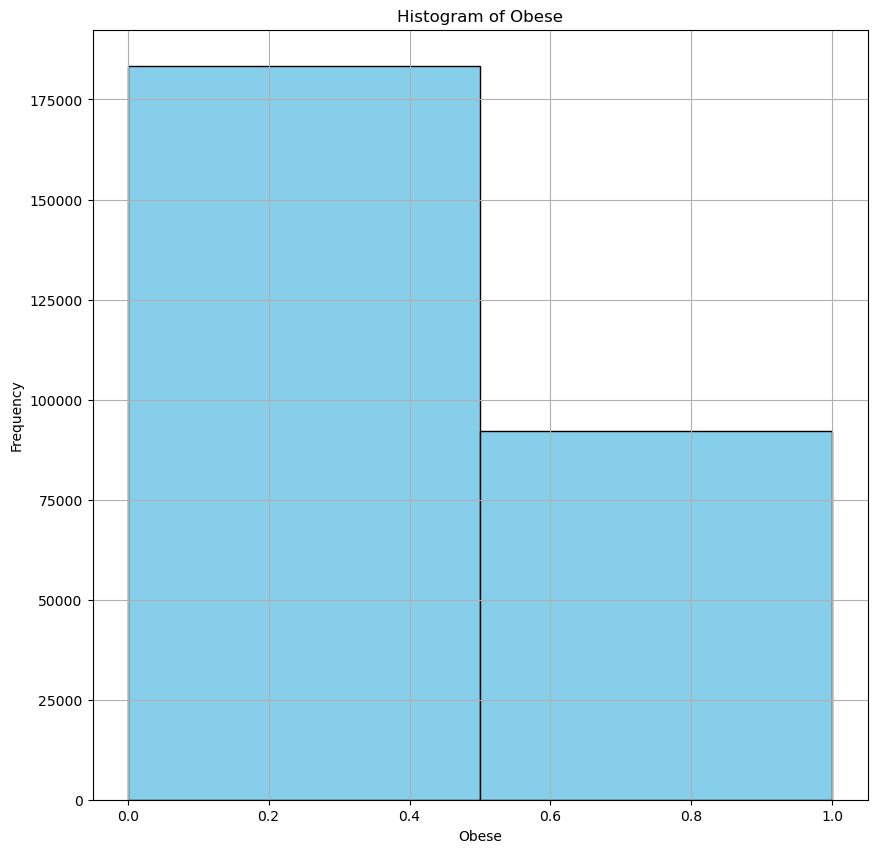

In [29]:
# Plotting Distributions for Exercise

import matplotlib.pyplot as plt

column_name = 'Obese'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

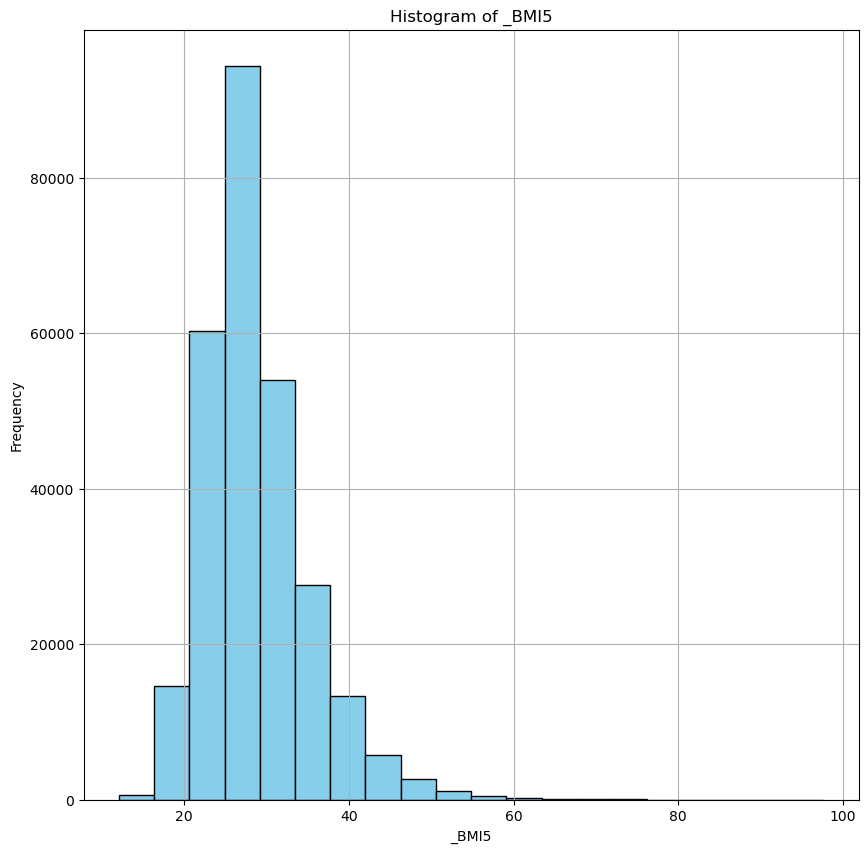

In [30]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = '_BMI5'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name] * 0.01), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

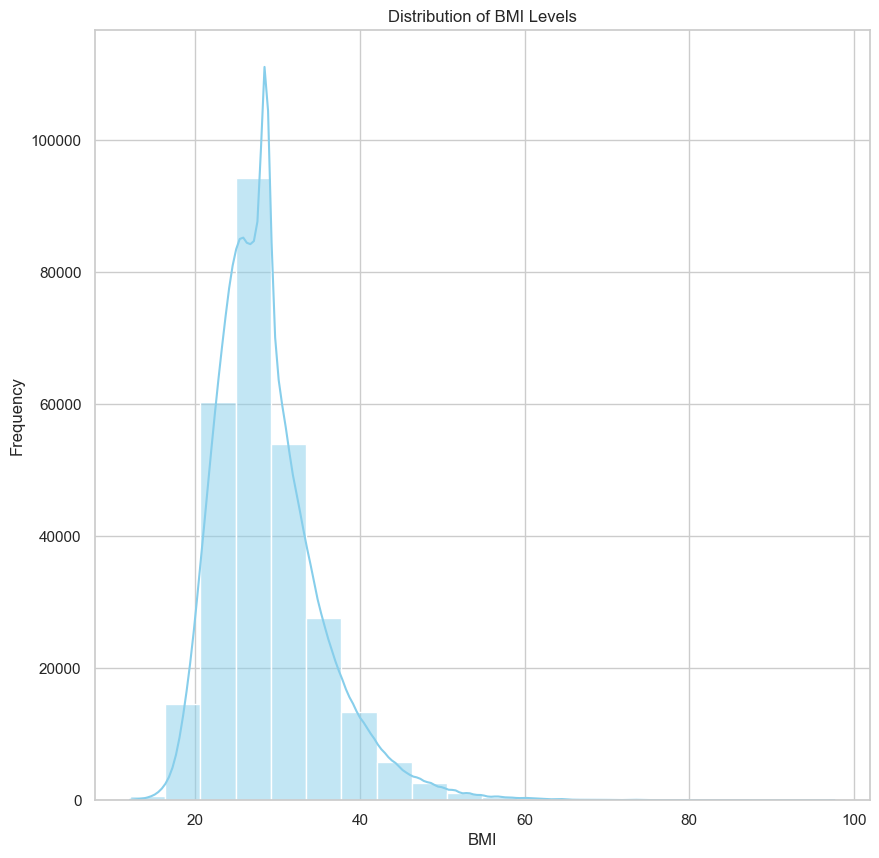

In [31]:
#Plotting a histogram to check the distribution of BMI values

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 10))
sns.histplot(data= (df_clean['_BMI5'] *.01), kde=True, color='skyblue', bins=20)

# Adding title and labels 
plt.title('Distribution of BMI Levels')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

Upon observation of the distribution, it does seem to be skewed to the right. The majority of values seem to be between BMI values of 20 to 40. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

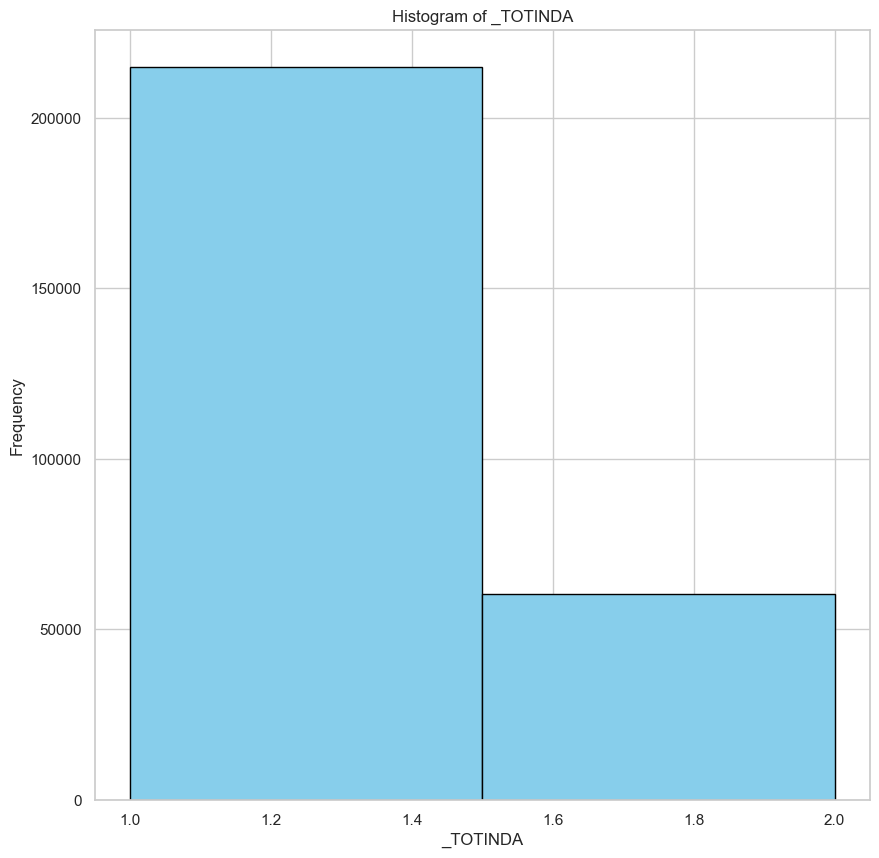

In [33]:
# Plotting Distributions for Exercise

import matplotlib.pyplot as plt

column_name = '_TOTINDA'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

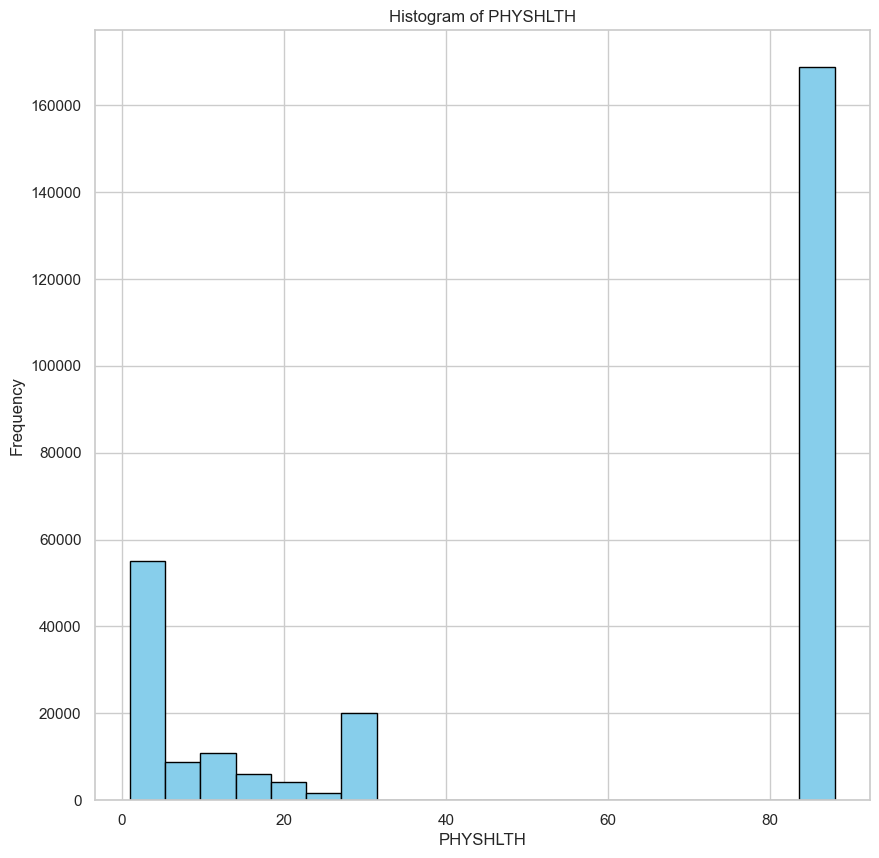

In [34]:
# Plotting Distributions for Physical health status

import matplotlib.pyplot as plt

column_name = 'PHYSHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

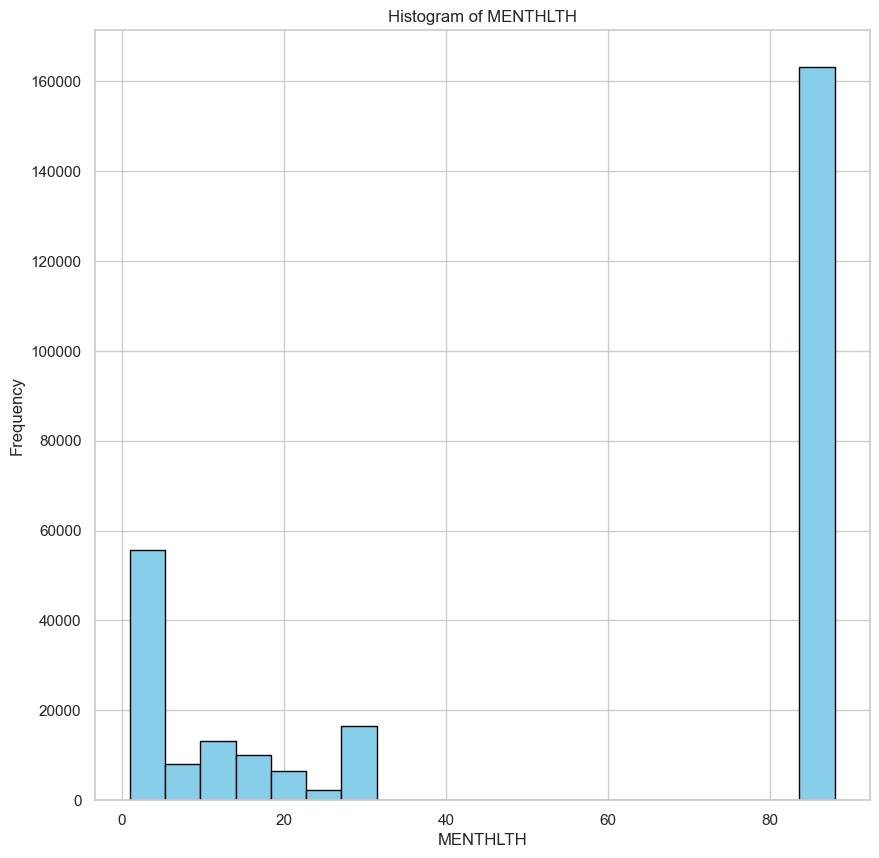

In [35]:
# Plotting Distributions for Mental health status

import matplotlib.pyplot as plt

column_name = 'MENTHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

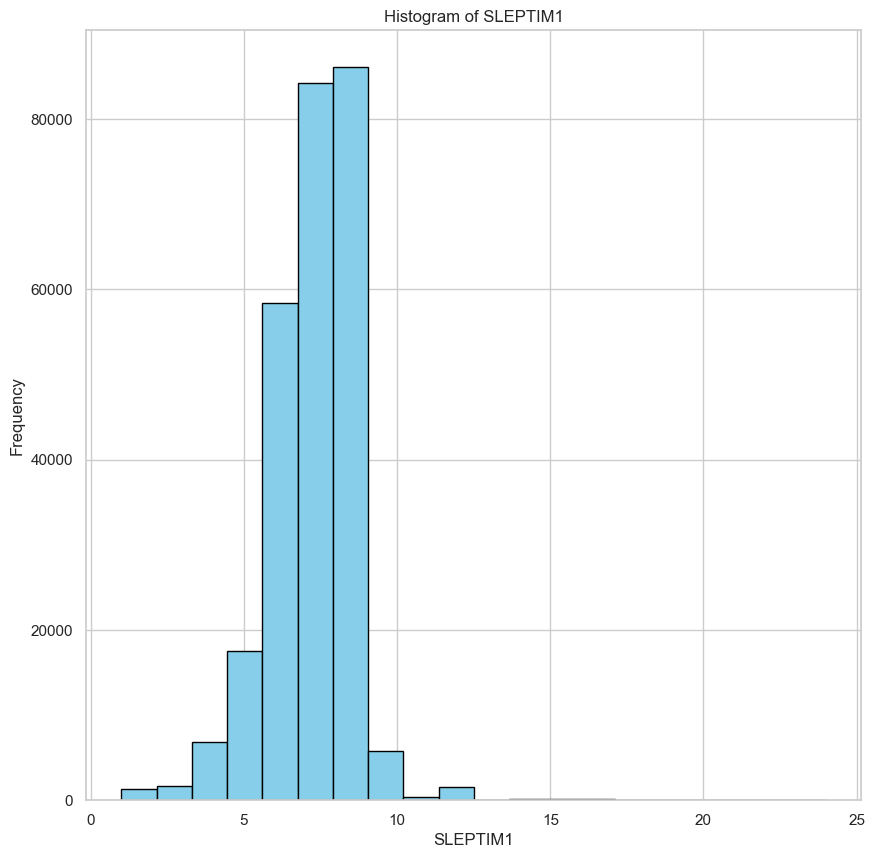

In [32]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = 'SLEPTIM1'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

_BMI5         1.000000
Obese         0.769222
Overweight    0.635145
GENHLTH       0.246556
_TOTINDA      0.160378
EXERANY2      0.160378
_RFHLTH       0.159880
_PHYS14D      0.118904
DRNKANY6      0.075928
_MENT14D      0.068109
_METSTAT      0.034572
_CHLDCNT      0.033692
_URBSTAT      0.028427
_IMPRACE      0.026849
_RACE1        0.018720
_RACEPR1      0.017512
_STATE        0.016650
_AGE_G        0.008735
ECIGNOW2      0.002733
_SMOKER3      0.001369
VETERAN3      0.000240
_SEX         -0.002333
_HLTHPLN     -0.003715
_AGE80       -0.010886
MARITAL      -0.013789
_AGEG5YR     -0.014637
EMPLOY1      -0.015409
_CURECI2     -0.017785
SMOKE100     -0.019313
_RFBING6     -0.022327
_HISPANC     -0.022634
USENOW3      -0.029416
PERSDOC3     -0.031878
_DRNKWK2     -0.036236
MENTHLTH     -0.038423
_MICHD       -0.044469
SLEPTIM1     -0.055083
DECIDE       -0.056882
CHECKUP1     -0.057285
_INCOMG1     -0.071554
_EDUCAG      -0.084246
PHYSHLTH     -0.088921
ADDEPEV3     -0.103187
_DRDXAR2   

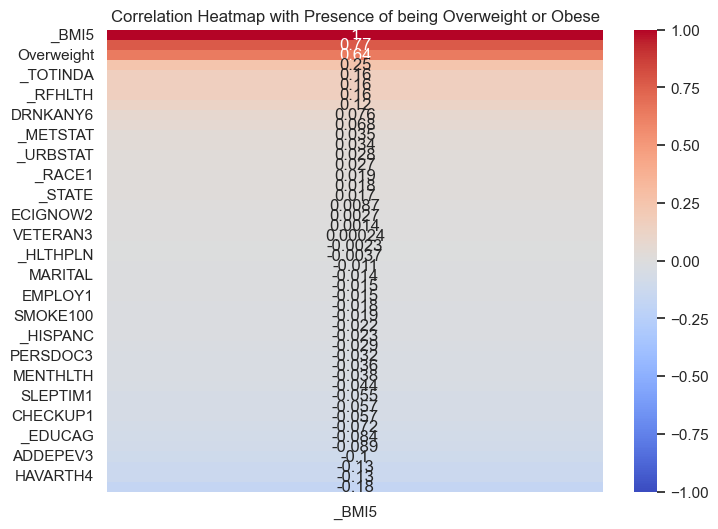

In [37]:
# Checking correlations between feature variables and BMI values 
print(df_clean.corr()["_BMI5"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr()[['_BMI5']].sort_values(by='_BMI5', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of being Overweight or Obese')
plt.show()


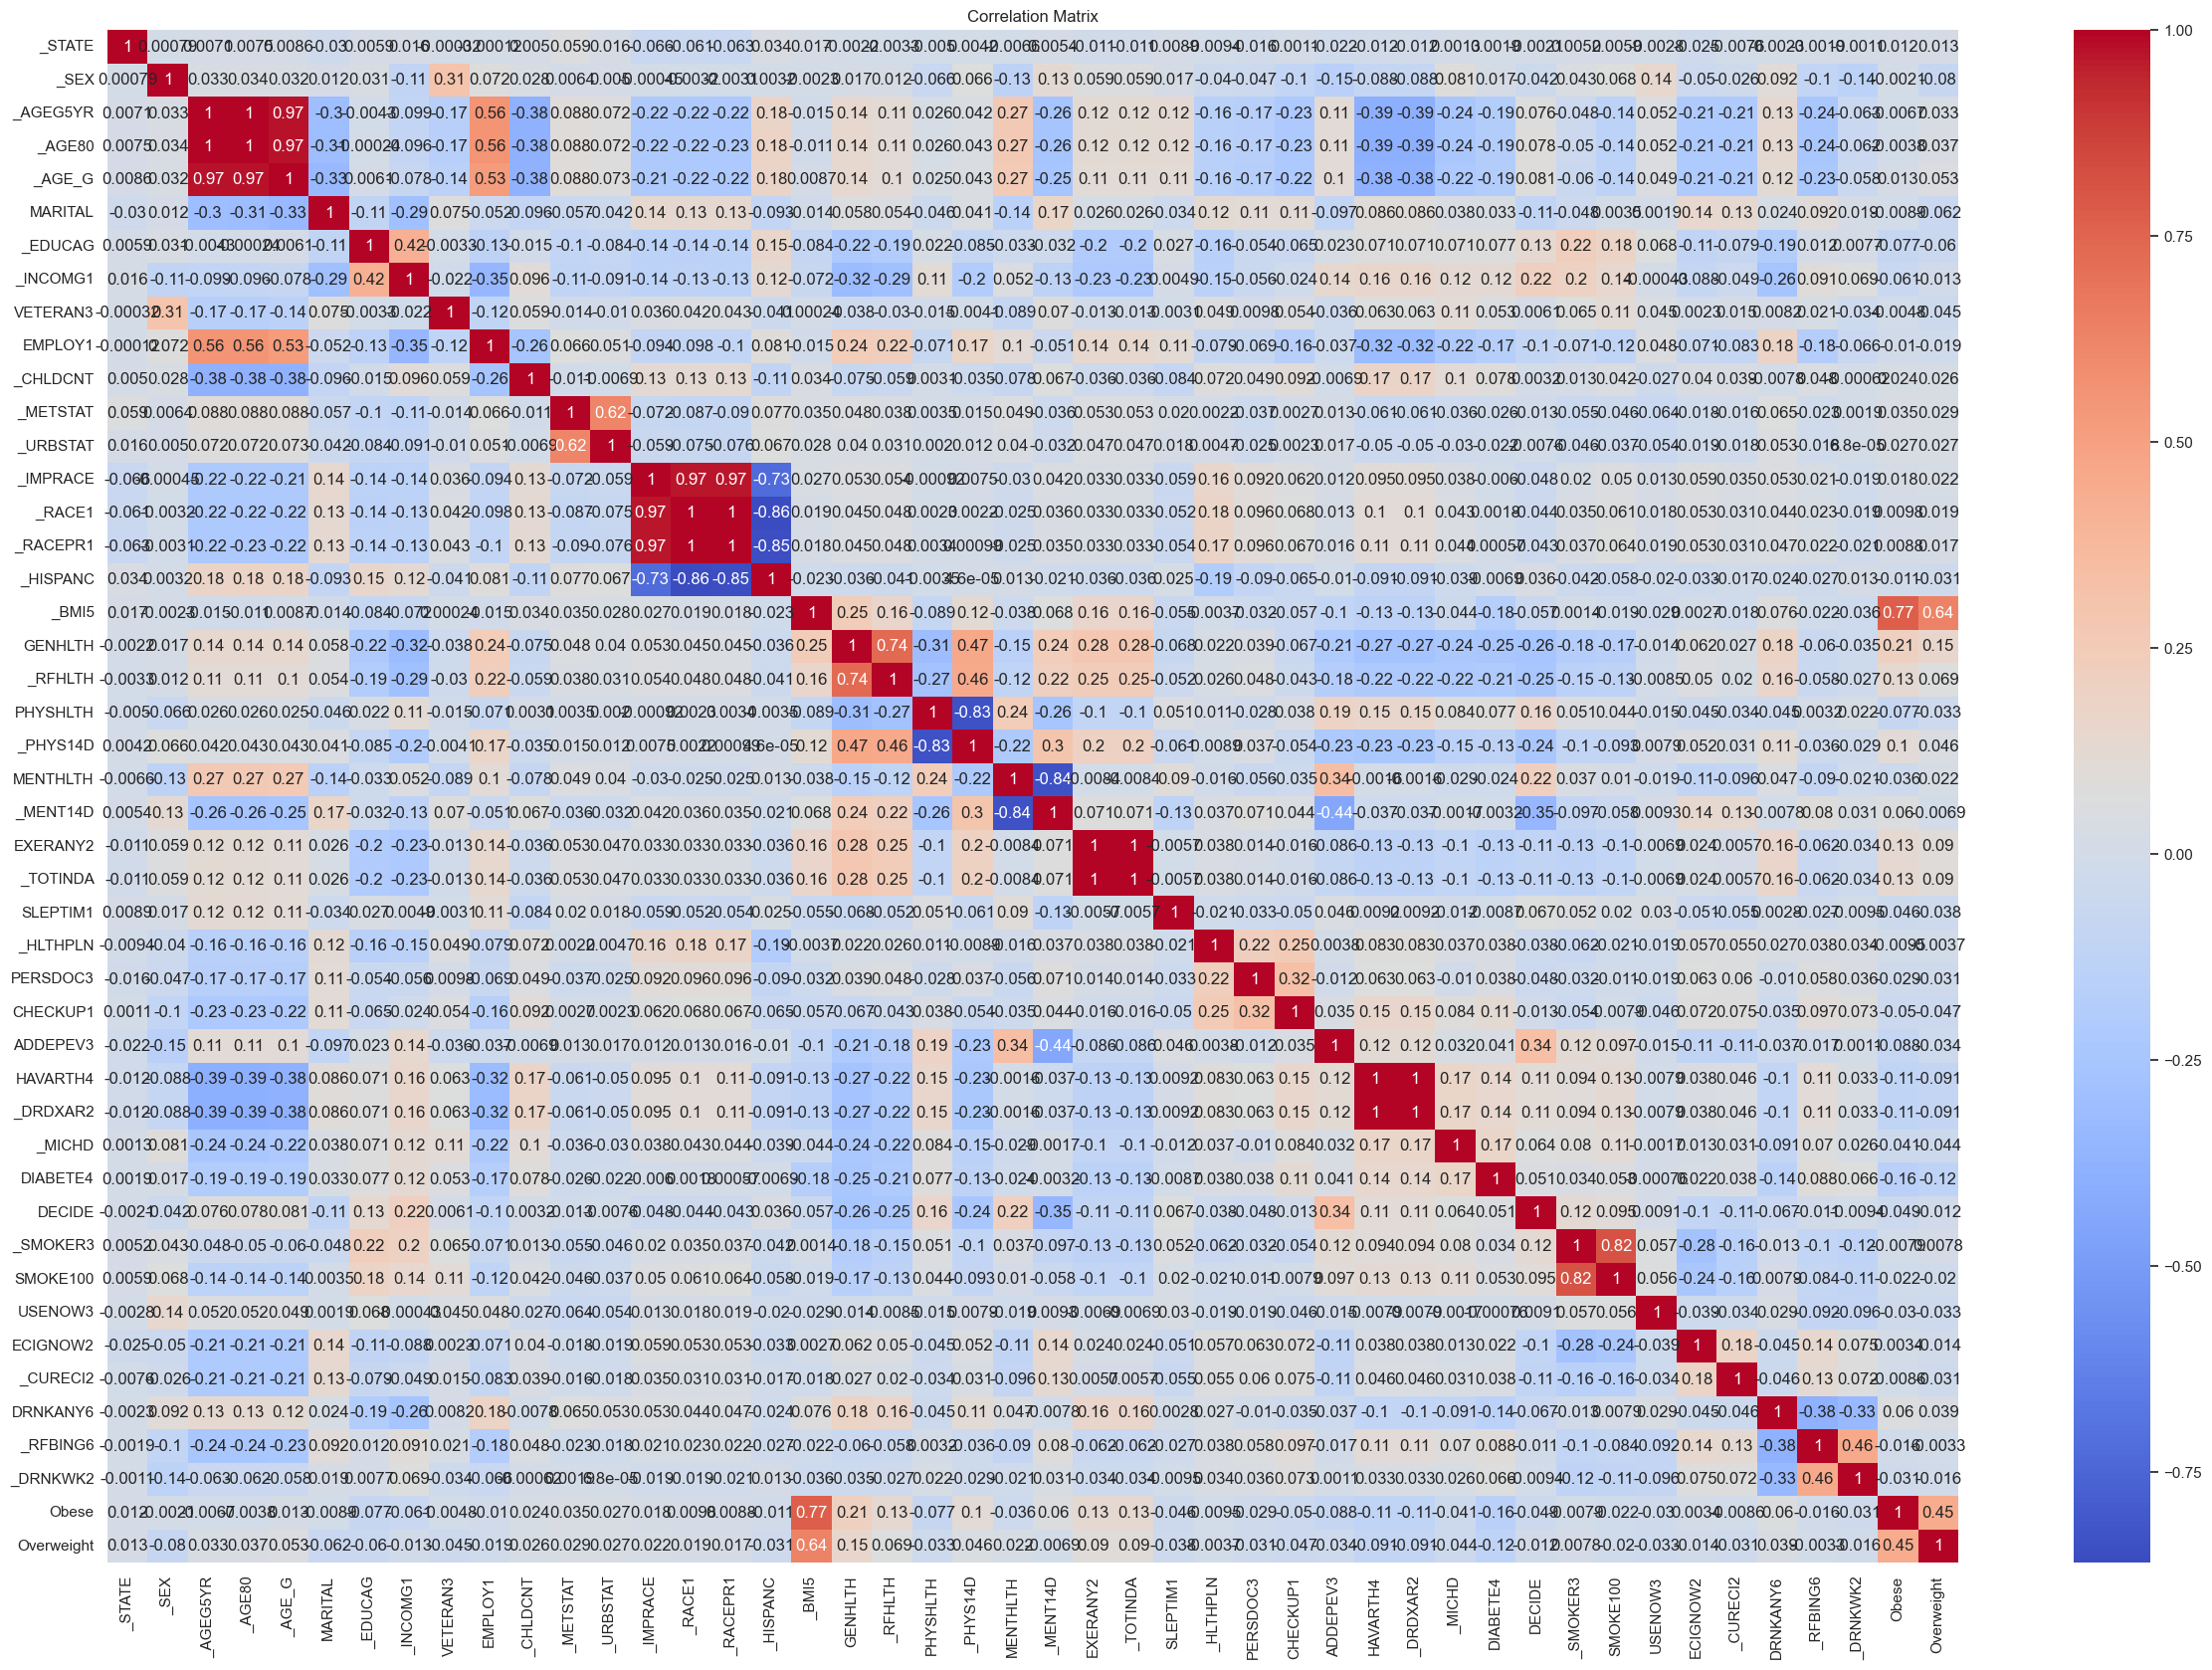

In [38]:
#Generating Correlation matrix
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Obese         1.000000
_BMI5         0.769222
Overweight    0.445721
GENHLTH       0.214567
_TOTINDA      0.132290
EXERANY2      0.132290
_RFHLTH       0.129326
_PHYS14D      0.099854
DRNKANY6      0.060458
_MENT14D      0.060186
_METSTAT      0.034705
_URBSTAT      0.026941
_CHLDCNT      0.023627
_IMPRACE      0.018253
_AGE_G        0.012638
_STATE        0.011505
_RACE1        0.009771
_RACEPR1      0.008801
ECIGNOW2      0.003370
_SEX         -0.002103
_AGE80       -0.003768
VETERAN3     -0.004794
_AGEG5YR     -0.006720
_SMOKER3     -0.007890
_CURECI2     -0.008571
MARITAL      -0.008927
_HLTHPLN     -0.009487
EMPLOY1      -0.010094
_HISPANC     -0.011253
_RFBING6     -0.016178
SMOKE100     -0.021671
PERSDOC3     -0.029278
USENOW3      -0.030183
_DRNKWK2     -0.030728
MENTHLTH     -0.036148
_MICHD       -0.041108
SLEPTIM1     -0.045907
DECIDE       -0.048804
CHECKUP1     -0.049601
_INCOMG1     -0.061227
PHYSHLTH     -0.076715
_EDUCAG      -0.077162
ADDEPEV3     -0.088447
_DRDXAR2   

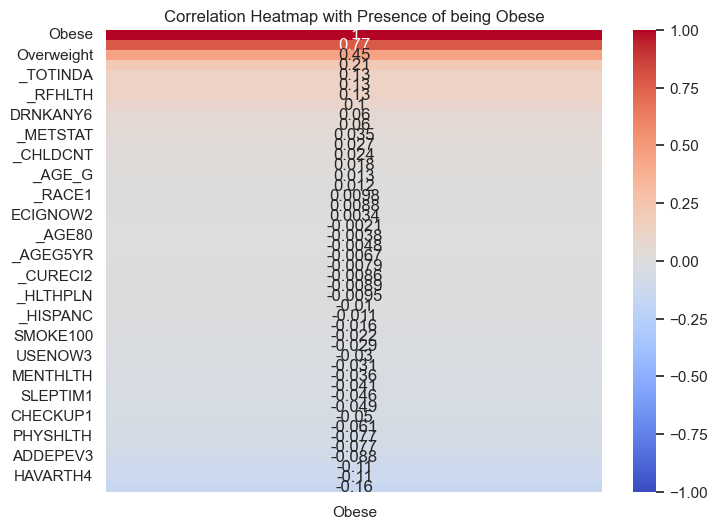

In [39]:
# Checking correlations between feature variables and BMI values 
print(df_clean.corr()["Obese"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr()[['Obese']].sort_values(by='Obese', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of being Obese')
plt.show()

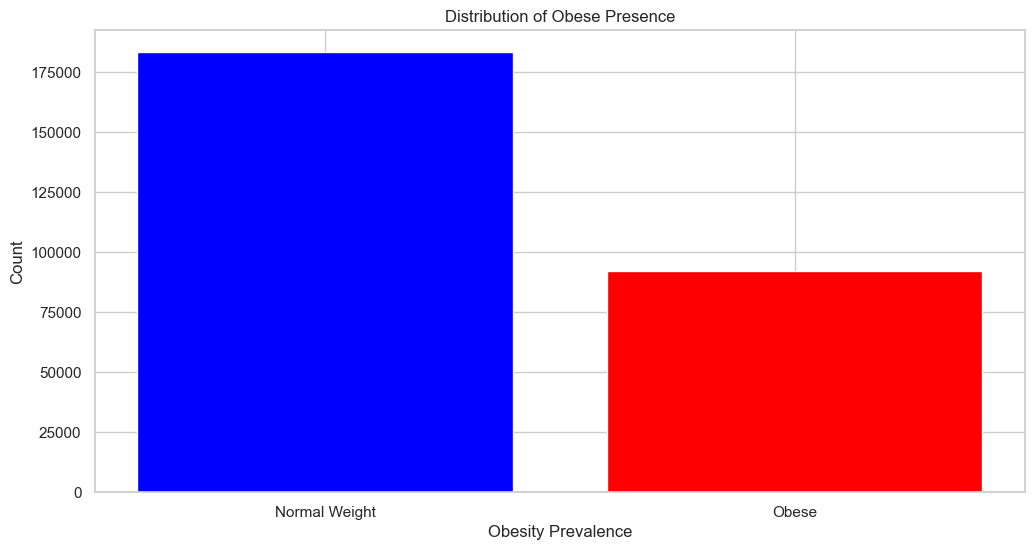

In [40]:
#Plotting visual for target variable

outcome_counts = df_clean['Obese'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['Normal Weight', 'Obese'])
plt.xlabel('Obesity Prevalence')
plt.ylabel('Count')
plt.title('Distribution of Obese Presence')
plt.show()

Upon observation of the distribution, it does seem to be skewed to the right. The majority of values seem to be between BMI values of 20 to 40. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

# Modeling

## Basic Logistic Regression Model 

#Spliting Data into train and test groups 
X = df_clean.drop(['_BMI5', '_BMI5CAT', 'Overweight', '_RFBMI5','Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling (optional for logistic regression, but can improve convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 6: Model Training
model = LogisticRegression(max_iter=1000)  # Increase max_iter for better convergence
model.fit(X_train_scaled, y_train)

#Step 7: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

#Additional evaluation metrics
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


#Splitting Data into train and test groups 
X = df_clean.drop(['_BMI5', '_BMI5CAT', 'Overweight', '_RFBMI5','Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initiating Standard Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Baseline Model Training
model = LogisticRegression(max_iter=1000)  # Increase max_iter for better convergence
model.fit(X_train_scaled, y_trai

#Baseline Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

In [41]:

# Splitting Data into train and test groups 
# Separating target variable from predictors
X = df_clean.drop(['_BMI5', 'Overweight', 'Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state = 42)
X_train_resample,y_train_resample = sm.fit_resample(X_train, y_train)

# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2
0,-0.272001,-1.085349,-0.463820,-0.338041,-0.251571,-0.759737,0.983673,0.959613,0.393751,-0.911136,0.507658,-0.647622,-0.403157,-0.456922,-0.425095,-0.436506,0.293432,-1.596029,-0.474963,0.805986,-0.745545,0.831510,-0.766200,-0.576455,-0.576455,0.005716,-0.222396,-0.810955,-0.416979,0.562686,0.779377,0.779377,0.329432,0.404246,0.36695,0.693506,0.852836,0.180301,-0.536001,-0.241554,-0.907515,-0.43426,0.696145
1,1.009236,0.990433,0.128469,0.020107,0.397433,-0.759737,0.983673,1.612872,0.393751,-0.558222,-0.531466,1.671290,-0.403157,-0.456922,-0.425095,-0.436506,0.293432,-1.596029,-0.474963,0.805986,-0.745545,0.831510,-0.766200,-0.576455,-0.576455,0.733470,-0.222396,-0.810955,1.965262,0.562686,0.779377,0.779377,0.329432,0.404246,0.36695,0.693506,0.852836,0.180301,-0.536001,-0.241554,-0.907515,-0.43426,-0.251624
2,0.945174,-1.085349,1.016901,1.154243,1.046437,1.689767,0.983673,0.306353,0.393751,1.206347,-0.531466,1.671290,2.689944,-0.456922,-0.425095,-0.436506,0.293432,-0.591271,-0.474963,0.805986,-0.745545,0.831510,-0.766200,-0.576455,-0.576455,-0.722038,-0.222396,-0.810955,-0.416979,0.562686,0.779377,0.779377,0.329432,0.404246,0.36695,-0.456912,-1.256097,0.180301,-0.536001,-0.241554,1.102809,-0.43426,-0.360846
3,-0.400125,0.990433,-1.944541,-1.949708,-2.198584,1.689767,-1.287644,-1.653426,0.393751,1.559261,-0.531466,-0.647622,-0.403157,-0.456922,-0.425095,-0.436506,0.293432,-1.596029,-0.474963,-1.099452,2.031132,-1.190981,0.613637,1.878502,1.878502,1.461224,-0.222396,-0.810955,-0.416979,-1.904650,0.779377,0.779377,0.329432,0.404246,0.36695,-0.456912,-1.256097,0.180301,2.130282,-0.241554,1.102809,-0.43426,-0.360846
4,-0.720434,0.990433,1.016901,0.915477,1.046437,-0.759737,0.983673,0.306353,0.393751,-0.911136,-0.531466,1.671290,2.689944,-0.456922,-0.425095,-0.436506,0.293432,-0.591271,-0.474963,-1.464879,0.642794,0.831510,-0.766200,-0.576455,-0.576455,0.733470,-0.222396,-0.810955,-0.416979,0.562686,0.779377,0.779377,0.329432,0.404246,0.36695,0.693506,0.852836,0.180301,-0.536001,-0.241554,-0.907515,-0.43426,-0.087203


In [42]:
#Instantiate the model 
baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

# Baseline test score 
baseline_score = baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
baseline_train_score = baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
baseline_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)


print("Baseline Training Score:", baseline_train_score)
print("Baseline Test Score:", baseline_score)
print("Cross Validation Scores:", baseline_cv)


# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)

Baseline Training Score: 0.6445455785095793
Baseline Test Score: 0.6379695357745865
Cross Validation Scores: [0.63973546 0.636156   0.64256494 0.65156474 0.64916138]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     36605
           1       0.47      0.63      0.54     18476

    accuracy                           0.64     55081
   macro avg       0.62      0.64      0.62     55081
weighted avg       0.67      0.64      0.65     55081



In [43]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [44]:
# Generating baseline model scores 
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.6445455785095793
Model's Test Score: 0.6379695357745865
Cross Validation Scores: [0.63973546 0.636156   0.64256494 0.65156474 0.64916138]
Model's Accuracy Score: 0.6379695357745865
Model's Precision Score: 0.470248974452703
Model's F1 Score: 0.5372995800171706
Model's Recall Score: 0.6266507902143321


## Decision Tree Classifier Model

In [45]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier 
dt_classifier.fit(X_train_scaled, y_train_resample)

# Make predictions for test data
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)

# Cross validating model
dt_cv = cross_val_score(dt_classifier, X_train_scaled, y_train_resample)


print("Decision Tree Training Score:", dt_train_score)
print("Decision Tree  Test Score:", dt_test_score)
print("Cross Validation Scores:", dt_cv)


# Classification report 
dt_report = classification_report(y_test, y_tree_pred)
print(dt_report)

Decision Tree Training Score: 0.9999897729597055
Decision Tree  Test Score: 0.6024581979266898
Cross Validation Scores: [0.55872026 0.56059521 0.6953876  0.82327674 0.82066885]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     36605
           1       0.41      0.43      0.42     18476

    accuracy                           0.60     55081
   macro avg       0.56      0.56      0.56     55081
weighted avg       0.61      0.60      0.60     55081



In [46]:
# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.9999897729597055
Model's Test Score: 0.6024581979266898
Cross Validation Scores: [0.55872026 0.56059521 0.6953876  0.82327674 0.82066885]
Model's Accuracy Score: 0.6024581979266898
Model's Precision Score: 0.4113500906970718
Model's F1 Score: 0.42026951894310455
Model's Recall Score: 0.42958432561160426


## K-Nearest Neighbors Model 

In [47]:
# Instantiate KNN Model 
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train_resample)
knn_y_pred = knn.predict(X_test_scaled)

# Knn Train Model Score
knn_train_score = knn.score(X_train_scaled, y_train_resample)

# Knn Test Model Score
knn_test_score = knn.score(X_test_scaled, y_test)


# Cross validating model
knn_cv = cross_val_score(knn, X_train_scaled, y_train_resample)


print("KNN Training Score:", knn_train_score)
print("KNN Test Score:", knn_test_score)
print("Cross Validation Scores:", knn_cv)


# Classification report 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

KNN Training Score: 0.8133599236380992
KNN Test Score: 0.6036927434142445
Cross Validation Scores: [0.64508761 0.64628077 0.68851844 0.74251722 0.74420468]
              precision    recall  f1-score   support

           0       0.73      0.65      0.68     36605
           1       0.43      0.52      0.47     18476

    accuracy                           0.60     55081
   macro avg       0.58      0.58      0.58     55081
weighted avg       0.63      0.60      0.61     55081



In [48]:
# Checking classification metrics
model_scores(knn, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.8133599236380992
Model's Test Score: 0.6036927434142445
Cross Validation Scores: [0.64508761 0.64628077 0.68851844 0.74251722 0.74420468]
Model's Accuracy Score: 0.6036927434142445
Model's Precision Score: 0.4251796313651984
Model's F1 Score: 0.4660616882322726
Model's Recall Score: 0.5156419138341632


## Random Forest Classifier Model 

In [49]:
# Random forest classifier model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train_resample)

# Getting test predictions
y_rfc_pred = rfc.predict(X_test_scaled)

# Random Forest Train Model Score
rfc_train_score = rfc.score(X_train_scaled, y_train_resample)

# Random Forest Test Model Score
rfc_test_score = rfc.score(X_test_scaled, y_test)

# Cross validating model
rfc_cv = cross_val_score(rfc, X_train_scaled, y_train_resample)


print("Random Forest Training Score:", rfc_train_score)
print("Random Forest Test Score:", rfc_test_score)
print("Cross Validation Scores:", rfc_cv)

# Classification report 
rfc_report = classification_report(y_test, y_rfc_pred)
print(rfc_report)


Random Forest Training Score: 0.999979545919411
Random Forest Test Score: 0.6936330131987437
Cross Validation Scores: [0.57320856 0.5762085  0.77007909 0.91003614 0.90802482]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     36605
           1       0.58      0.33      0.42     18476

    accuracy                           0.69     55081
   macro avg       0.65      0.60      0.60     55081
weighted avg       0.67      0.69      0.67     55081



In [50]:
# Checking classification metrics
model_scores(rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.999979545919411
Model's Test Score: 0.6936330131987437
Cross Validation Scores: [0.57320856 0.5762085  0.77007909 0.91003614 0.90802482]
Model's Accuracy Score: 0.6936330131987437
Model's Precision Score: 0.5766542181365508
Model's F1 Score: 0.4164735986721532
Model's Recall Score: 0.3259363498592769


# Hyperparameter Tuning 
## Baseline Model Tuning 

In [51]:
# Utilizing GridSearch to find best combination of parameters
# Define hyperparameter grid, looking at regularization strength, regularization type and solver options
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1, 2, 3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(baseline_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_log_reg = grid_search.best_estimator_

# Using tuned model for predictions
y_grid_pred = best_log_reg.predict(X_test_scaled) 

Best Hyperparameters:  {'C': 1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.6438296856889616


In [52]:
#Instantiate the model with tuned hyperparameters
tuned_baseline_model = LogisticRegression(random_state = 42, C = 1, penalty = 'l2',
                                          solver = 'liblinear', max_iter = 5 )

# Fit the model to the data
tb_model = tuned_baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_tuned_pred= tuned_baseline_model.predict(X_test_scaled)

# Baseline test score 
tuned_baseline_score = tuned_baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
tuned_baseline_train_score = tuned_baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_baseline_cv = cross_val_score(tuned_baseline_model, X_train_scaled, y_train_resample)


print("Tuned Baseline Training Score:", tuned_baseline_train_score)
print("Tuned Baseline Test Score:", tuned_baseline_score)
print("Tuned Cross Validation Scores:", tuned_baseline_cv)

Tuned Baseline Training Score: 0.6442762664484898
Tuned Baseline Test Score: 0.6387502042446579
Tuned Cross Validation Scores: [0.6394116  0.63624122 0.64261608 0.65149656 0.64938297]


In [53]:
# Classification metrics for tuned baseline model
model_scores(tuned_baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.6442762664484898
Model's Test Score: 0.6387502042446579
Cross Validation Scores: [0.6394116  0.63624122 0.64261608 0.65149656 0.64938297]
Model's Accuracy Score: 0.6387502042446579
Model's Precision Score: 0.4710056275997064
Model's F1 Score: 0.5372342899669751
Model's Recall Score: 0.6251353106733059


## Random Forest Tuning 

In [55]:
# Utilizing GridSearch to find best combination of parameters for the Random Forest Model

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples  
}

# Create a GridSearchCV object
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
rfc_grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", rfc_grid_search.best_params_)
print("Best Score: ", rfc_grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_rfc = rfc_grid_search.best_estimator_

# Using tuned model for predictions
y_rfc_grid_pred = best_rfc.predict(X_test_scaled)  

Best Hyperparameters:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 5}
Best Score:  0.7362037226426672


In [56]:
#Instantiate the model with tuned hyperparameters
tuned_rfc = RandomForestClassifier(random_state = 42, bootstrap = True, max_depth = 10, 
                                   min_samples_leaf = 2, min_samples_split = 10, n_estimators = 5)

# Fit the model to the data
tuned_rfc.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_rfc_tuned_pred= tuned_rfc.predict(X_test_scaled)

# Tuned test score 
tuned_rfc_test_score = tuned_rfc.score(X_test_scaled, y_test)

# Tuned train score 
tuned_rfc_train_score = tuned_rfc.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_rfc_cv = cross_val_score(tuned_rfc, X_train_scaled, y_train_resample)


print("Tuned Random Forest Training Score:", tuned_rfc_train_score)
print("Tuned Random Forest Test Score:", tuned_rfc_test_score)
print("Tuned Random Forest Cross Validation Scores:", tuned_rfc_cv)

Tuned Random Forest Training Score: 0.7576123269925683
Tuned Random Forest Test Score: 0.6885859007643289
Tuned Random Forest Cross Validation Scores: [0.57794709 0.57960046 0.74919888 0.89034908 0.88392309]


In [57]:
# Classification metrics for best rfc model
model_scores(tuned_rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.7576123269925683
Model's Test Score: 0.6885859007643289
Cross Validation Scores: [0.57794709 0.57960046 0.74919888 0.89034908 0.88392309]
Model's Accuracy Score: 0.6885859007643289
Model's Precision Score: 0.5567859902137523
Model's F1 Score: 0.4306058091286308
Model's Recall Score: 0.3510500108248539


# Feature Importance and Confusion Matrix

## Tuned Baseline Model Feature Importances

_RACEPR1: 1.6219379876824769
_AGEG5YR: 1.2749287730694359
_IMPRACE: 0.7968981100403448
_AGE_G: 0.7045699014343075
GENHLTH: 0.5736449772372019
_RACE1: 0.5251153892543969
_AGE80: 0.40863827290210086
_HISPANC: 0.32732289130139547
DIABETE4: 0.22759758982229694
_SMOKER3: 0.22391726268000942
_RFHLTH: 0.20077985069176887
EMPLOY1: 0.17174527523441632
SMOKE100: 0.11792140927719116
ADDEPEV3: 0.0978269107570366
HAVARTH4: 0.09748039131742632
_DRDXAR2: 0.09748039131742632
EXERANY2: 0.09086140542488005
_TOTINDA: 0.09086140542488005
_PHYS14D: 0.08486055913087998
_EDUCAG: 0.08285268701516542
PERSDOC3: 0.07678677804865482
CHECKUP1: 0.07423241793852801
PHYSHLTH: 0.05658823369466331
SLEPTIM1: 0.051774587455778835
MARITAL: 0.04416634132077814
DECIDE: 0.043908588448128893
_CHLDCNT: 0.04346207775198978
_CURECI2: 0.042267532467178084
_SEX: 0.04191484421259533
DRNKANY6: 0.03524272249917716
MENTHLTH: 0.03479633119932055
ECIGNOW2: 0.03437424862207705
USENOW3: 0.0326837828112271
_DRNKWK2: 0.031865082963881
_METS

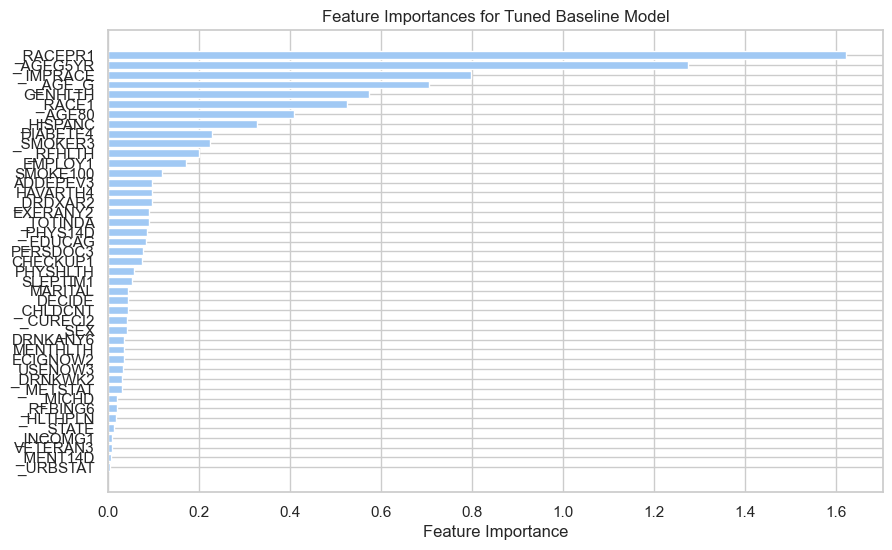

In [58]:
# Getting the coefficients (weights) of the features
coef = tuned_baseline_model.coef_[0]

# Calculating the feature importances by taking the absolute values of the coefficients
feature_importances = abs(coef)

# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 6))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Tuned Baseline Model')
plt.gca().invert_yaxis() 
plt.show()

In [59]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_base_tuned_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[23633 12972]
 [ 6926 11550]]


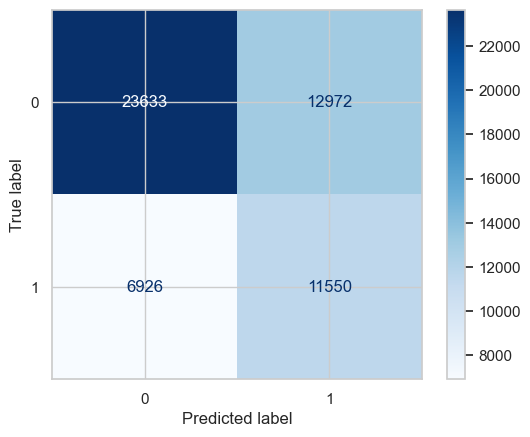

In [60]:
# Visualize confusion matrix
tbcf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=tb_model.classes_)
tbcf_disp.plot(cmap=plt.cm.Blues)

## Tuned RFC Model Feature Importance 

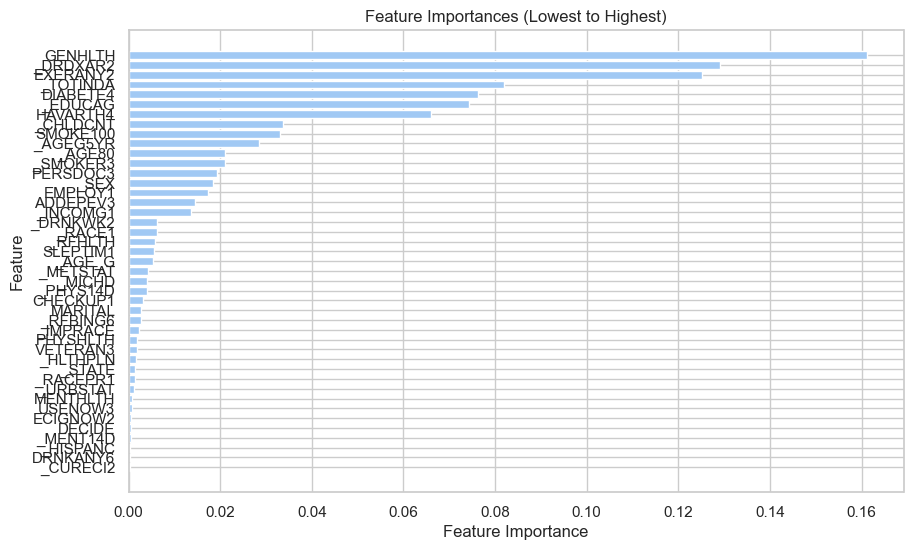

In [66]:
# Getting the feature importances from the tuned RandomForestClassifier
feature_importances = tuned_rfc.feature_importances_
feature_importances

# Sort the feature importances from lowest to highest
sorted_indices = feature_importances.argsort()
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Plotting the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)  
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Lowest to Highest)')
plt.show()